<a href="https://colab.research.google.com/github/Vasudev2512/Start_GitHub/blob/main/Groundwater_potential_Model_Using_RF_or_NB_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Using **Random forest algorithm**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/Chota Nagpur Wastershed final.csv")

In [ ]:
df.sample(5)

,Elevation,Slope(Degree),Drainage Density(km^2),TWI,Lineament(km^2),Annual Rainfall(cm),NDVI,LULC,Soil,Lithology,Geomorphology,gwpz
111,112.08,28.64,0.59,3.61,0.21,112.37,0.45,Agricultural Lands,Fine Loamy,BIOTITE GNEISS,Valley Fill,Moderate
149,295.50,39.98,0.70,24.26,0.33,113.25,0.23,Forests,Fine Silt,HORNBLENDE GNEISS,Valley Fill,Poor
123,202.01,16.36,0.23,4.09,0.17,111.65,0.43,Sandy Lands,Fine Loamy,GRANITE GNEISS,River,Poor
7,23.63,42.50,0.65,12.56,0.00,100.76,0.23,Water Bodies,Fine Silt,BIOTITE GNEISS,Pediment,Very Poor
129,54.83,30.98,0.15,20.18,0.01,100.01,0.29,Other Lands,Clayey Loamy,ANORTHOSITE,Pediment,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Elevation               170 non-null    float64
 1   Slope(Degree)           170 non-null    float64
 2   Drainage Density(km^2)  170 non-null    float64
 3   TWI                     170 non-null    float64
 4   Lineament(km^2)         170 non-null    float64
 5   Annual Rainfall(cm)     170 non-null    float64
 6   NDVI                    170 non-null    float64
 7   LULC                    170 non-null    object 
 8   Soil                    170 non-null    object 
 9   Lithology               170 non-null    object 
 10  Geomorphology           170 non-null    object 
 11  gwpz                    170 non-null    object 
dtypes: float64(7), object(5)
memory usage: 16.1+ KB


In [ ]:
# Read and prepare the data
def prepare_data(df):
    # Create label encoder for categorical variables
    le = LabelEncoder()

    # List of categorical columns to encode
    categorical_columns = ['LULC', 'Soil', 'Lithology', 'Geomorphology', 'gwpz']

    # Encode categorical columns
    for col in categorical_columns:
        if col in df.columns:  # Ensure the column exists in the data
            df[col] = le.fit_transform(df[col])

    # Separate features and target
    X = df.drop('gwpz', axis=1)
    y = df['gwpz']

    return X, y



In [ ]:
# Train and evaluate the model
def train_evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return rf_model, X_test, y_test, y_pred, feature_importance, accuracy, report

In [ ]:
# Create evaluation plots
def plot_evaluation(y_test, y_pred, feature_importance):
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature importance plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

In [ ]:
# Usage
# 'df' is  DataFrame loaded with the GWPZ dataset with 11 features
X, y = prepare_data(df)
rf_model, X_test, y_test, y_pred, feature_importance, accuracy, report = train_evaluate_model(X, y)

# Print accuracy and classification report
print("Model Accuracy:", accuracy)

Model Accuracy: 0.19607843137254902


In [ ]:
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.67      0.31         6
           1       0.20      0.17      0.18        12
           2       0.00      0.00      0.00         9
           3       0.50      0.27      0.35        15
           4       0.00      0.00      0.00         9

    accuracy                           0.20        51
   macro avg       0.18      0.22      0.17        51
weighted avg       0.22      0.20      0.18        51



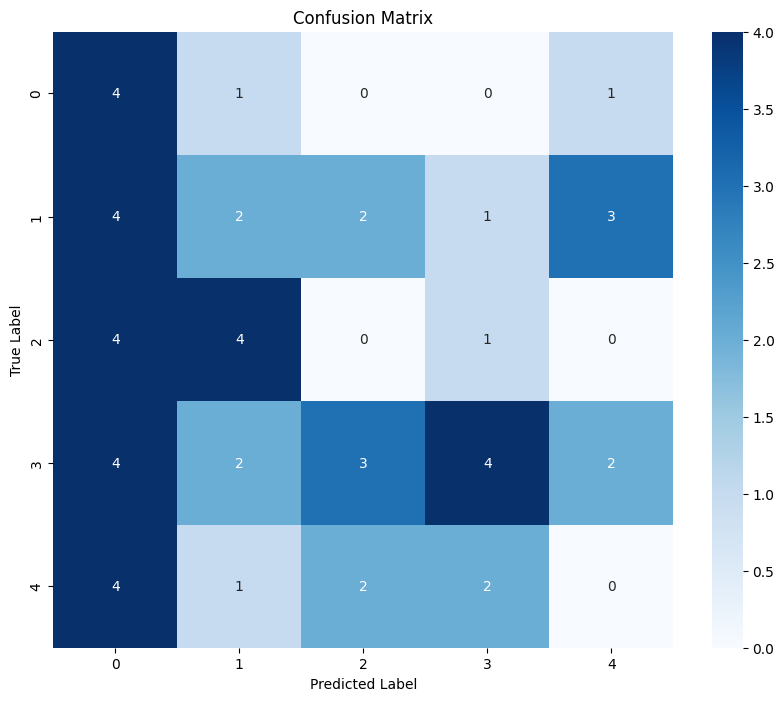

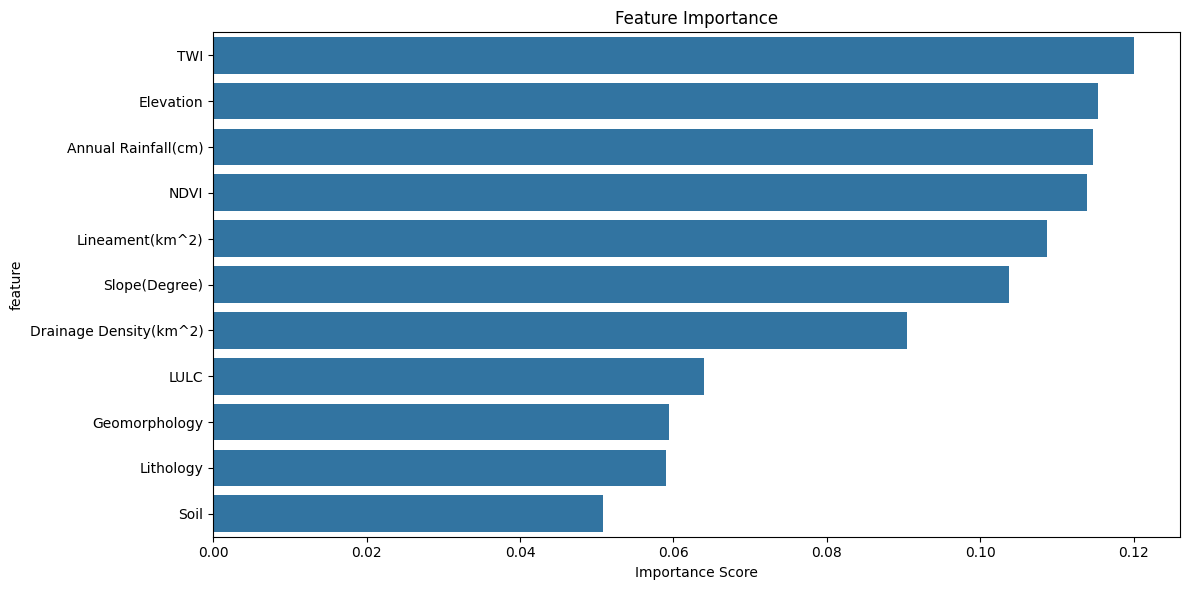

In [ ]:
# Plot evaluation metrics
plot_evaluation(y_test, y_pred, feature_importance)

Using **NB(Naive_bayes) Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv('/content/Chota Nagpur Wastershed final.csv')
df.sample(5)

,Elevation,Slope(Degree),Drainage Density(km^2),TWI,Lineament(km^2),Annual Rainfall(cm),NDVI,LULC,Soil,Lithology,Geomorphology,gwpz
164,364.94,35.63,0.73,25.27,0.36,107.61,0.31,Other Lands,Fine Silt,HORNBLENDE GNEISS,Pediment,Moderate
21,313.10,33.85,0.07,22.70,0.29,110.06,0.32,Forests,Fine Silt,ANORTHOSITE,Pediplain,Moderate
22,113.29,30.74,0.04,24.29,0.04,108.84,0.26,Sandy Lands,Clayey Loamy,BIOTITE GNEISS,Pediplain,Moderate
86,140.79,9.65,0.34,13.55,0.22,110.92,0.47,Water Bodies,Fine Loamy,PRESENT DEPOSIT,Pediment,Very Poor
45,274.10,21.85,0.75,7.36,0.55,98.74,0.21,Other Lands,Fine Loamy,GRANITE GNEISS,Pediment,Poor


In [ ]:
# Read and prepare the data
def prepare_data(df):
    # Create label encoder for categorical variables
    le = LabelEncoder()

    # List of categorical columns to encode, excluding 'gwpz' to keep its original encoding
    categorical_columns = ['LULC', 'Soil', 'Lithology', 'Geomorphology']

    # Encode categorical columns
    for col in categorical_columns:
        if col in df.columns:  # Ensure the column exists in the data
            df[col] = le.fit_transform(df[col])

    # Separate features and target
    X = df.drop('gwpz', axis=1)
    y = df['gwpz']  # Keep 'gwpz' with its original encoding

    return X, y


In [ ]:
# Train and evaluate the model
def train_evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Naïve Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return nb_model, X_test, y_test, y_pred, accuracy, report

In [ ]:
# Create evaluation plots
def plot_evaluation(y_test, y_pred):
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
# 'df' is DataFrame loaded with the GWPZ dataset with 11 features
X, y = prepare_data(df)
nb_model, X_test, y_test, y_pred, accuracy, report = train_evaluate_model(X, y)

# Print accuracy report
print("Model Accuracy:", accuracy)




Model Accuracy: 0.17647058823529413


In [ ]:
# Print classification report
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        Good       0.08      0.33      0.13         3
    Moderate       0.00      0.00      0.00        10
        Poor       0.00      0.00      0.00         7
   Very Good       0.33      0.44      0.38         9
   Very Poor       0.33      0.20      0.25         5

    accuracy                           0.18        34
   macro avg       0.15      0.20      0.15        34
weighted avg       0.14      0.18      0.15        34

